In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_row',15)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
file_path = '/content/teste_indicium_precificacao.csv'

## Tratamento dos dados e Visualização



Dicionários dos dados:

id – Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo

nome - Representa o nome do anúncio

host_id - Representa o id do usuário que hospedou o anúncio

host_name – Contém o nome do usuário que hospedou o anúncio

bairro_group - Contém o nome do bairro onde o anúncio está localizado

bairro - Contém o nome da área onde o anúncio está localizado

latitude - Contém a latitude do local

longitude - Contém a longitude do local

room_type – Contém o tipo de espaço de cada anúncio

price - Contém o preço por noite em dólares listado pelo anfitrião

minimo_noites - Contém o número mínimo de noites que o usuário deve reservar

numero_de_reviews - Contém o número de comentários dados a cada listagem

ultima_review - Contém a data da última revisão dada à listagem

reviews_por_mes - Contém o número de avaliações fornecidas por mês

calculado_host_listings_count - Contém a quantidade de listagem por host

disponibilidade_365 - Contém o número de dias em que o anúncio está disponível para reserva


In [3]:
dados = pd.read_csv(file_path)

In [4]:
dados.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [5]:
dados.shape

(48894, 16)

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [7]:
dados['id'].nunique()
#Não existem Id repetidos

48894

In [8]:
dados['nome'].nunique()

47904

In [9]:
#Verificando os nomes repetidos
nomes_rep = dados['nome'].value_counts()
nomes_rep.value_counts()
nomes_rep = list(nomes_rep[nomes_rep >= 2].index)

dados.loc[dados['nome'].isin(nomes_rep),:].sort_values('nome')

#Achei que poderiam ser dados repetidos, mas aparentemente são dados únicos, mudando alguns detalhes como localização e etc

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
34346,27237604,*NO GUEST SERVICE FEE* Luxury Midtown One Bedr...,205031545,Red Awning,Manhattan,Midtown,40.75294,-73.96731,Entire home/apt,737,3,2,2019-06-07,0.40,49,235
34351,27237625,*NO GUEST SERVICE FEE* Luxury Midtown One Bedr...,205031545,Red Awning,Manhattan,Midtown,40.75459,-73.96707,Entire home/apt,737,3,3,2019-06-10,0.44,49,153
42816,33241978,1 BR Suite in Midtown Manhattan,24831061,Hosteeva,Manhattan,Midtown,40.76391,-73.98071,Private room,250,1,0,NaN,NaN,8,0
42775,33216329,1 BR Suite in Midtown Manhattan,24831061,Hosteeva,Manhattan,Midtown,40.76453,-73.98035,Private room,250,1,0,NaN,NaN,8,0
7945,6101104,1 BR UPPER EAST SIDE,9107715,Michele,Manhattan,Upper East Side,40.77526,-73.95075,Entire home/apt,170,5,26,2019-05-18,0.55,1,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16865,13435688,❤ of Manhattan | Fantastic 1 Bedroom,3191545,Kyle,Manhattan,Theater District,40.76369,-73.98476,Entire home/apt,150,30,1,2019-05-31,0.77,23,335
21779,17510141,❤ of Manhattan | Fantastic 1 Bedroom,3191545,Kyle,Manhattan,Theater District,40.76321,-73.98356,Entire home/apt,243,30,0,NaN,NaN,23,364
45412,34737337,"步行9分钟到法拉盛缅街中心的电梯房,提供免费矿泉水可乐",151810361,Jungyen,Queens,Flushing,40.76187,-73.82169,Private room,69,1,9,2019-06-28,4.91,6,365
45358,34692728,"步行9分钟到法拉盛缅街中心的电梯房,提供免费矿泉水可乐",151810361,Jungyen,Queens,Flushing,40.76364,-73.82292,Private room,59,1,9,2019-07-07,4.82,6,362


In [10]:
#Quantos grupos de bairros estamos trabalhandoe a distribuição
dados['bairro_group'].value_counts()

,count
bairro_group,
Manhattan,21661
Brooklyn,20103
Queens,5666
Bronx,1091
Staten Island,373


In [11]:
import plotly.express as px
fig = px.histogram (dados, x = 'bairro_group')
fig.update_layout(title ='Distruição da quantidade de Airbnb por grupos de bairro',
                  xaxis_title = 'Grupos de Bairro',
                  yaxis_title = 'Contagem')
fig.show()

A maioria dos Airbnb ficam concentrada nos grupos Manhattan e no Brooklyn, enquanto uma pequena minoria está distribuída entres os demais grupos de bairros

In [12]:
cores = ['blue','orange','green','red']
room_bairro = pd.crosstab(dados['bairro_group'],dados['room_type'])
fig = px.bar(room_bairro, barmode = 'group',
      title = 'Distribuição do tipo de Airbnb por grupo de bairros')
fig.show()

A maioria dos grupos de bairros segue um padrão de ter mais apartamento do tipo Private Room disponiveis em relação aos outros tipos de sala, enquanto em Manhattan a tendência é o contrário existem mais Airbnb do tipo Entire Home/Apt, e em em números significativos, e essa cacacterística pode refletir um mercado mais premium e orientado para atender hóspedes que buscam conforto, privacidade e proximidade dos principais pontos turísticos da cidade. O contrário (mais Private Rooms em outros bairros) pode ser explicado por um público mais diversificado ou por moradores locais alugando parte de suas residências como uma forma de renda extra.

In [13]:
dados['room_type'].value_counts()

,count
room_type,
Entire home/apt,25409
Private room,22325
Shared room,1160


In [14]:
dados.groupby(['bairro_group','room_type'])['price'].mean()
#Visualizar o preço medio de cada tipo de Airbnb por grupo de bairro

bairro_group   room_type      
Bronx          Entire home/apt    127.506596
               Private room        66.788344
               Shared room         59.800000
Brooklyn       Entire home/apt    178.327545
               Private room        76.492942
               Shared room         50.527845
Manhattan      Entire home/apt    249.239109
               Private room       116.776622
               Shared room         88.977083
Queens         Entire home/apt    147.050573
               Private room        71.762456
               Shared room         69.020202
Staten Island  Entire home/apt    173.846591
               Private room        62.292553
               Shared room         57.444444
Name: price, dtype: float64

Para deixar gráficamente mais claro a divisão de preço médio por grupos de bairros e tipos de sala

In [65]:
preco_medio = dados.groupby(['bairro_group', 'room_type'])['price'].mean().reset_index()
fig = px.bar(
    preco_medio,
    x='bairro_group',
    y='price',
    color='room_type',
    barmode='group',
    title='Preço Médio do Airbnb por Grupo de Bairros e Tipo de Sala',
    labels={'price': 'Preço Médio', 'bairro_group': 'Grupo de Bairros'},
)
fig.show()


In [15]:
dados.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [16]:
dados['price'].quantile(q = np.linspace(0,1,11))
#Dividindo o preço em pedaços de 10%, para podermos ver com mais exatidão como esta aumenta o preço

,price
0.0,0.0
0.1,49.0
0.2,60.0
0.3,75.0
0.4,90.0
0.5,106.0
0.6,130.0
0.7,155.0
0.8,200.0
0.9,269.0


In [17]:
dados.loc[dados['price'] >= 9999, :].sort_values('price', ascending = False)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
9150,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
17691,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
29237,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83
6529,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,2015-01-02,0.02,1,0
12341,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83
40432,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,NaN,1,365


In [63]:
dados0 = dados.groupby('room_type')['price'].mean()
fig = px.bar(x = dados0.index, y = dados0.values,  barmode = 'group',
             title = 'Preço médio por tipo de Airbnb')
fig.show()

In [18]:
#Plotando uma gráfico para ver a média de preços de cada bairro
dados1 = dados.groupby('bairro_group')['price'].mean()
fig = px.bar(dados1,x = dados1.index, y = dados1.values,  barmode = 'group',
             title = 'Preço médio por grupo de bairro')
fig.show()
'''
 Apesar dos altos valores que podem ser considerados outlier, o valor da media e mediana se mantem parecidos, ou seja são outlier
que não interferem tanto no preço médio de cada grupo de bairro
'''

'\nApesar dos altos valores que podem ser considerados outlier, o valor da media e mediana se mantem parecidos, ou seja são outlier\nque não interferem tanto no preço médio de cada grupo de bairro\n'

In [19]:
#Criando uma varíavel nova que pode ajudar a responder o valor mínimo para cada apartamento
#Valor mínimo para alugar o AirBnB
dados['price_min'] = dados['price']*dados['minimo_noites']
dados2 = dados.groupby('bairro_group')['price_min'].mean()
fig = px.bar(x = dados2.index, y = dados2.values,  barmode = 'group',
             title = 'Preço médio mínimo por grupo de bairros')
fig.show()

As variáveis de preço mínimo e preço por noite não apresentam grandes diferenças visualmente no gráfico, mas os valores médios são bastante distintos. Isso pode ser útil na hora de decidir onde se hospedar ou até mesmo investir em um imóvel para alugar. Por exemplo, enquanto em Manhattan o preço médio por noite é de aproximadamente 200 dólares, o valor médio para um aluguel completo pode chegar a quase 10 vezes mais. Para viagens curtas, esse custo elevado pode não compensar.

In [20]:
'''
  Vamos olhar os 10 Bairros mais caros de se morar no nosso dataset
'''
bairros_caros = dados.groupby('bairro')['price'].mean().sort_values(ascending = False).head(10)
#renomeando as colunas
bairros_caros.index.name = 'Bairro'
bairros_caros.name = 'Preço Médio'
bairros_caros = pd.DataFrame(bairros_caros)
#formatando o preço
bairros_caros['Preço Médio'] = bairros_caros['Preço Médio'].map('$ {:,.2f}'.format)
print('Top bairros mais caros por noite')
bairros_caros

Top bairros mais caros por noite


,Preço Médio
Bairro,
Fort Wadsworth,$ 800.00
Woodrow,$ 700.00
Tribeca,$ 490.64
Sea Gate,$ 487.86
Riverdale,$ 442.09
Prince's Bay,$ 409.50
Battery Park City,$ 367.56
Flatiron District,$ 341.93
Randall Manor,$ 336.00


In [21]:
fig = px.bar(bairros_caros, x = bairros_caros.index, y = bairros_caros['Preço Médio'],
             title = 'Top 10 bairros mais caros por noite',
             orientation = 'h')
fig.show()


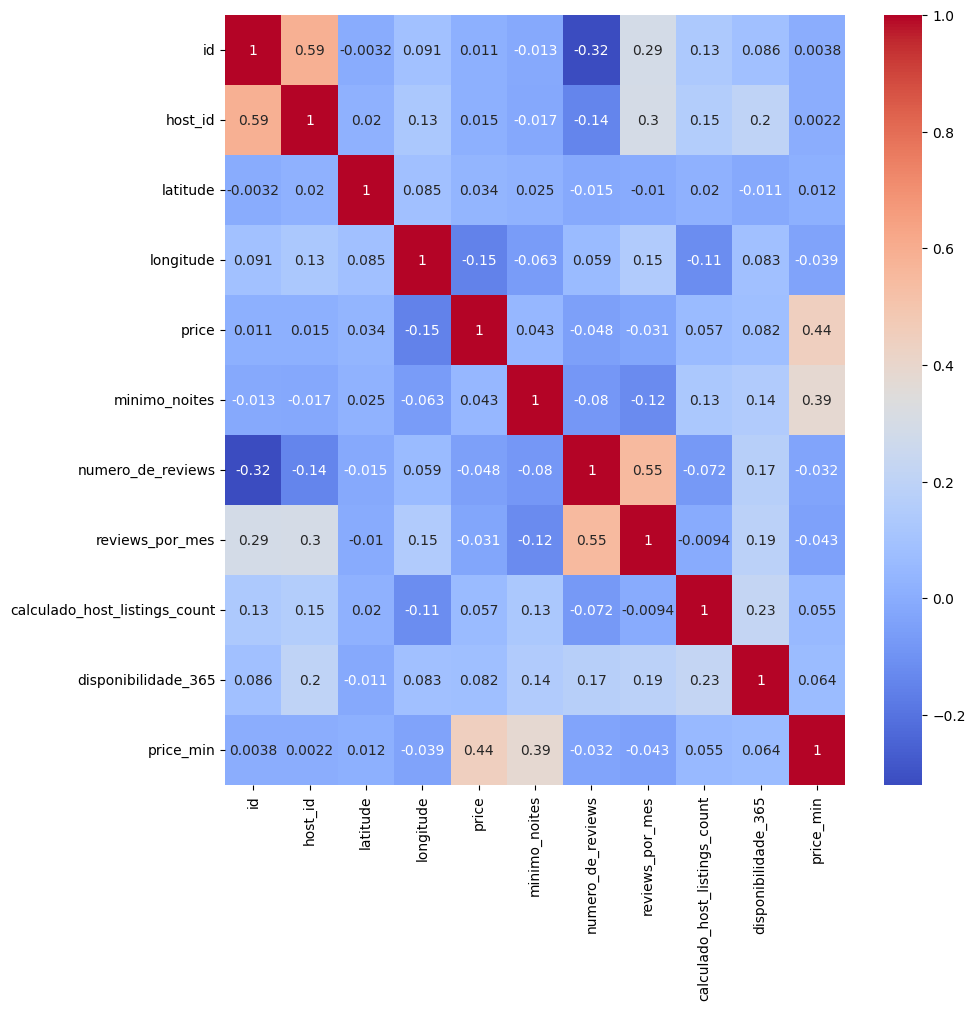

In [22]:
'''
  Olhando a correlação das variaveis númericas em relação ao preço, e outras varíaveis tbm
'''
corr = dados.select_dtypes(np.number).corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot = True, cmap ='coolwarm')
plt.show()

Ao analisar a variável price, é possível notar que ela apresenta uma baixa correlação com as demais variáveis. Isso sugere que, isoladamente, nenhuma variável tem um impacto significativo no preço por noite. No entanto, a combinação de todas elas pode oferecer uma visão mais completa. Para explorar essa relação, utilizarei um algoritmo de ML, que permitirá estimar o preço com base nessa interação entre as variáveis.



# Preparando os dados e aplicando um algoritmo de previsão

In [23]:
'''Apagando os valores acima de 9999, notei que esse outlier não impactavam tanto o modelo,
e era mais importante deixar dentro do dataset
dados = dados.loc[dados['price'] < 9999,:]
'''

"Apagando os valores acima de 9999, notei que esse outlier não impactavam tanto o modelo,\ne era mais importante deixar dentro do dataset\ndados = dados.loc[dados['price'] < 9999,:]\n"

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
dados.shape

(48894, 17)

In [26]:
dados.isna().sum().sort_values(ascending = False)

,0
reviews_por_mes,10052
ultima_review,10052
host_name,21
nome,16
id,0
...,...
latitude,0
bairro,0
bairro_group,0
host_id,0


In [27]:
#dados['reviews_por_mes']= dados['reviews_por_mes'].fillna(0)

In [28]:
dados['ultima_review']
'''
  Transformando a coluna 'ultima_review' em uma coluna bivariada com 1 e 0
'''
dados['ultima_review'] = dados['ultima_review'].apply(lambda x: 1 if x != np.nan else 0)
dados['ultima_review']

,ultima_review
0,1
1,1
2,1
3,1
4,1
...,...
48889,1
48890,1
48891,1
48892,1


In [29]:
dados['numero_de_reviews'] = dados['numero_de_reviews'].fillna(0)
dados['reviews_por_mes'] = dados['reviews_por_mes'].fillna(0)

In [30]:
#apagandos os valores na
dados = dados.dropna()

In [31]:
dados.isna().sum().sort_values(ascending = False)

#as colunas 'host_name' e 'nome', não irei ultilizar no modelo de ML, então deixarei como está

,0
id,0
price,0
disponibilidade_365,0
calculado_host_listings_count,0
reviews_por_mes,0
...,...
bairro,0
bairro_group,0
host_name,0
host_id,0


## Modelo de Arvore de decisão

In [32]:
dados.isna().sum()

,0
id,0
nome,0
host_id,0
host_name,0
bairro_group,0
...,...
ultima_review,0
reviews_por_mes,0
calculado_host_listings_count,0
disponibilidade_365,0


In [33]:
dados['ultima_review']
'''
  Transformando a coluna 'ultima_review' em uma coluna bivariada com 1 e 0
'''
dados['ultima_review'] = dados['ultima_review'].apply(lambda x: 1 if x != np.nan else 0)
dados['ultima_review']

,ultima_review
0,1
1,1
2,1
3,1
4,1
...,...
48889,1
48890,1
48891,1
48892,1


In [34]:
#Primeiro preencher os valores vazios
dados['reviews_por_mes'] = dados['reviews_por_mes'].fillna(0)
dados['ultima_review'] = dados['ultima_review'].fillna(0)

In [35]:
#Apagando as linhas com valores faltantes
dados = dados.dropna()

In [36]:
dados.isna().sum()

,0
id,0
nome,0
host_id,0
host_name,0
bairro_group,0
...,...
ultima_review,0
reviews_por_mes,0
calculado_host_listings_count,0
disponibilidade_365,0


In [37]:
#Separando o alvo das outras variaveis
X = dados.drop(columns = ['price','id','nome','host_id','bairro','host_name','price_min'])
y = dados['price']

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [39]:
#Separando os dados entre teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [41]:
X_train.shape

(39085, 16)

In [42]:
X_test.shape

(9772, 16)

In [43]:
#Treinando o modelo


In [44]:
random = RandomForestRegressor(n_estimators=100, random_state=42)
random.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [45]:
#previstos
y_pred_test = random.predict(X_test)
y_pred_train = random.predict(X_train)

mae_test = mean_absolute_error(y_test,y_pred_test)
mae_train = mean_absolute_error(y_train,y_pred_train)

print(f'MAE no treino: {mae_train}')
print(f'MAE no teste: {mae_test}')

rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_test))
rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_train))

r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)

print(f'RMSE no treino: {rmse_train}')
print(f'RMSE no teste: {rmse_test}')
print(f'R2 no treino: {r2_train}')
print(f'R2 no teste: {r2_test}')

MAE no treino: 25.234748271471823
MAE no teste: 66.42824191567745
RMSE no treino: 87.6553950620495
RMSE no teste: 211.56125587903918
R2 no treino: 0.87195999209023
R2 no teste: 0.0775872203773812


Nosso modelo pode estar sofrendo de pouco de overfiting, pode ser interessanta tentar deixar o nosso mais mais simplista, para tentar diminuir esse overfiting

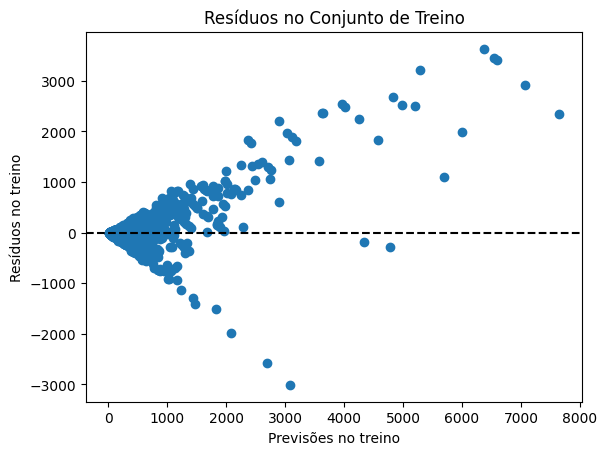

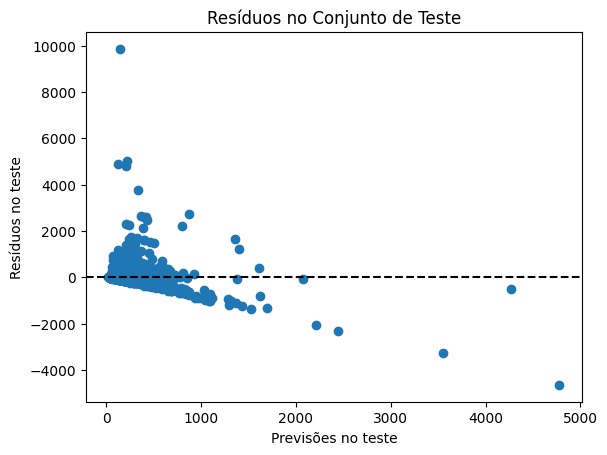

In [46]:
import matplotlib.pyplot as plt

residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

# Plotando os resíduos para o conjunto de treino
plt.scatter(y_pred_train, residuals_train)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Previsões no treino')
plt.ylabel('Resíduos no treino')
plt.title('Resíduos no Conjunto de Treino')
plt.show()

# Plotando os resíduos para o conjunto de teste
plt.scatter(y_pred_test, residuals_test)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Previsões no teste')
plt.ylabel('Resíduos no teste')
plt.title('Resíduos no Conjunto de Teste')
plt.show()

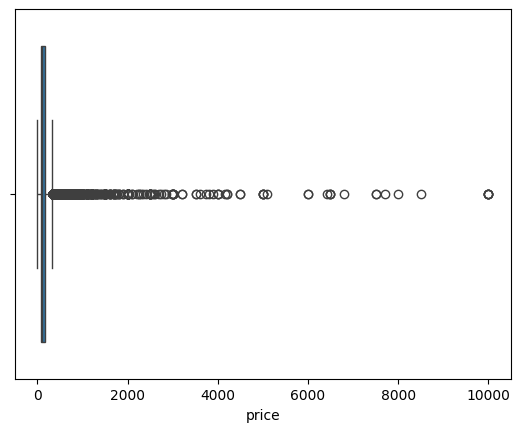

In [67]:
sns.boxplot(x = y_train);

Os valores muito distante estão fazendo uma certa interfência no nosso modelo, valores como 9999 e 10000, talvez uma possibilidade é avaliar a exclusão desses valores para ver como nosso modelo se sai, mas tirando isso parece ser um modelo promissor um pouco melhor que o Modelo de Regressão Linear Multipla, ao menos por hora

In [48]:
'''
  Tentando diminuir a quantidade arvores no nosso modelo de Random Forest pra torna
  a coisa toda menos complexa
'''

random2 = RandomForestRegressor(
    n_estimators= 100, #definindo o n de arvores em 100
    max_depth = 10, # deixando as avores mais simples pra tentar evitar overfiting
    min_samples_split = 5,
    min_samples_leaf= 5,
    random_state=42
)

In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(random2, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(scores)

[-52386.34841665 -52476.58755116 -58455.0911277  -49208.08831957
 -39847.30618372]


In [50]:
random2.fit(X_train,y_train)

y_pred_test2 = random2.predict(X_test)
y_pred_train2 = random2.predict(X_train)

mae_test2 = mean_absolute_error(y_test,y_pred_test2)
mae_train2 = mean_absolute_error(y_train,y_pred_train2)

print(f'MAE no treino: {mae_train2}')
print(f'MAE no teste: {mae_test2}')

MAE no treino: 61.35424777759792
MAE no teste: 65.04951228166313


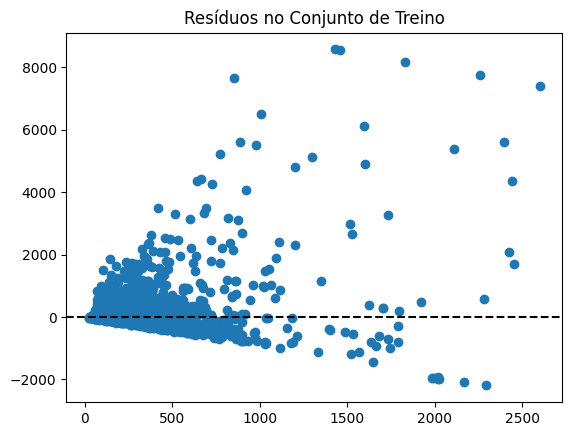

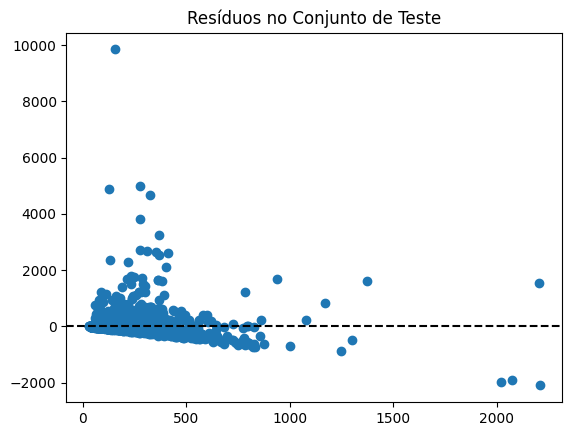

In [51]:
#Plotando os residuos

residuals_train2 = y_train - y_pred_train2
residuals_test2 = y_test - y_pred_test2

#residuos no conjunto de treino
plt.scatter(y_pred_train2, residuals_train2)
plt.title('Resíduos no Conjunto de Treino')
plt.axhline(y = 0, color ='black',linestyle ='--')
plt.show()

#residuos no conjuto de teste
plt.scatter(y_pred_test2, residuals_test2)
plt.title('Resíduos no Conjunto de Teste')
plt.axhline(y = 0, color ='black',linestyle ='--')
plt.show()

No geral, o modelo apresentou um desempenho satisfatório. Os resíduos ficaram próximos de 0, indicando que, na maioria das vezes, a diferença entre os valores previstos e os reais foi pequena, exceto em alguns casos onde o modelo teve menor precisão. Observou-se que, conforme os valores aumentam, a precisão do modelo tende a diminuir. Isso pode ser explicado pela influência de algumas variáveis que não possuem uma relação tão clara com a variável alvo. Além disso, alguns preços muito altos (que não são considerados outliers, pois fazem sentido no contexto do dataset) também podem ter impactado os resultados.

Durante o processo, acabei criando dois modelos: um mais simples e outro mais complexo. No entanto, as previsões de ambos foram bastante semelhantes, sugerindo que o modelo mais complexo não trouxe ganhos significativos em relação à simplicidade. Inicialmente, considerei remover valores muito altos do dataset, como preços acima de 9999, mas decidi mantê-los, pois julguei importante que o modelo fosse treinado também com esses valores para refletir melhor a realidade dos dados.

Por fim testando o valor previsto para as seguintes caracteristicas:


{'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}


In [52]:
#prevendo o preço
dados_test = {'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}


In [53]:
dados_test = pd.DataFrame(dados_test, index = [0])

In [54]:
#dados_test= dados_test.drop(columns = ['id','nome','host_id','bairro','host_name'])
dados_test['ultima_review'] = 0
#como é so uma linha posso fazer isso
dados_test = pd.get_dummies(dados_test)

colunas_faltantes = X_train.columns

dados_test = dados_test.reindex(columns=colunas_faltantes, fill_value=0)

dados_test.shape

(1, 16)

In [61]:
#prevendo o valor com o Random forest do dados_test

valor_previsto = random.predict(dados_test)[0]
valor_previsto2 = random2.predict(dados_test)[0]
print(f'Valor previsto pelo primeiro modelo: {float(valor_previsto):.2f}')
print(f'Valor previsto pelo segundo modelo: {float(valor_previsto2):.2f}')

Valor previsto pelo primeiro modelo: 289.74
Valor previsto pelo segundo modelo: 336.12


Esses valores fazem sentido ao analisarmos  o preço médio de apartamentos com salas do tipo 'Entire Home/Apt, e também o preço médios nos de Bairro Manhattan